# Neural Network Implementation

In this notebook we will implement the neural network. In this notebook we will first read our dataset and then we will initialize the Neural Network and then we will first train it and then test it on testing dataset.


# Libraries to be used

In this notebook we will use following libraries:

    Numpy
    Keras (For Neural Network)
    Matplotlib
    Pickle
    OpenCV



In [1]:
from keras.preprocessing import image
import numpy as np
import pickle
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras import layers
import cv2
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing import image



Using TensorFlow backend.


# Data Preprocessing

In [2]:
img=image.load_img('/home/pacho/Downloads/Data/Train/colon_aca/colonca1.jpeg')

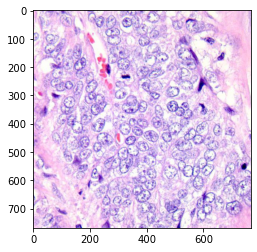

In [3]:
plt.imshow(img)

In [4]:
cv2.imread('/home/pacho/Downloads/Data/Train/colon_aca/colonca1.jpeg').shape

(768, 768, 3)

In [5]:
data_dir = '/home/pacho/Downloads/Data/Train'
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2,
                                                          horizontal_flip=True,
                                                          vertical_flip=True,
                                                          brightness_range=[0.5,1.5],
                                                          rescale = 1./255,)

train_it = datagen.flow_from_directory(data_dir,
                                       class_mode = "categorical",
                                       target_size = (256, 256),
                                       color_mode="rgb",
                                       batch_size = 32, 
                                       shuffle = True,
                                       subset='training',
                                       seed = 2020)

validate_it = datagen.flow_from_directory(data_dir,
                                       class_mode = "categorical",
                                       target_size = (256,256),
                                       color_mode="rgb",
                                       batch_size = 32, 
                                       shuffle = True,
                                       subset='validation',
                                       seed = 2020)


Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [6]:
train_it.class_indices

{'colon_aca': 0, 'colon_n': 1, 'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}

In [7]:
test_it = datagen.flow_from_directory('/home/pacho/Downloads/Data/Test',
                                                         class_mode = "categorical",
                                                         target_size = (256,256),
                                                         color_mode="rgb",
                                                         batch_size = 32, 
                                                         shuffle = True,
                                                         subset='validation',
                                                         seed = 2020)

Found 1500 images belonging to 5 classes.


In [8]:
test_it.class_indices

{'colon_aca': 0, 'colon_n': 1, 'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}

# Initializing the model


[Conv2D*3 -> MaxPool2D -> Dropout] x4→ (filters = 16, 32, 64, 96)


In [9]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 16)      64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 252, 252, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 32)     

# Model Training

In [ ]:
batch_size=32
history =model.fit(train_it, steps_per_epoch=45, epochs=50, validation_data = validate_it, validation_steps=20,)

# Visualizing Accuracy

In the code section below we will visualize the training vs validation accuracy.


In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.show()

# Saving Model

Now we will save the model and the weights in a file, so in that way we can use this model in future.


In [10]:
# serialize model to JSON
model_json = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("cnn_model.h5")
print("Saved model to disk")

Saved model to disk


# Loading Saved Model

Now we will load the saved model to test it with testing dataset


In [11]:
from keras.models import model_from_json

json_file = open('cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("cnn_model.h5")

print("Loaded model from disk")
 
# Compiling loaded model
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loaded model from disk


# Evaluating the model on testing dataset

In [12]:
loaded_model.evaluate(train_it, verbose=1)

625/625 [==============================] - 298s 477ms/step


[1.6091132164001465, 0.20000000298023224]